In [3]:
import timm
from fastai.vision.all import *
import torch

In [4]:
# Create a model

In [12]:
model = timm.create_model('resnet34')
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [14]:
x = torch.randn(1, 3, 224, 224)
model(x).shape # 1000 for imagenet

torch.Size([1, 1000])

In [15]:
# To create a pretrained model, simply pass in `pretrained=True`.

In [16]:
pretrained_res34 = timm.create_model('resnet34', pretrained=True)

C:\Users\mgupta70.ASURITE\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mgupta70.ASURITE\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [17]:
# To create a model with a custom number of classes, simply pass in `num_classes=<number_of_classes>`

In [18]:
model = timm.create_model('resnet34', pretrained = True, num_classes =3)
x = torch.randn(1,3,224,224)
model(x).shape # output

torch.Size([1, 3])

In [19]:
# List Models with Pretrained Weights

In [20]:
avail_pretrained_models = timm.list_models(pretrained=True)
len(avail_pretrained_models), avail_pretrained_models[:5]

(1163,
 ['bat_resnext26ts.ch_in1k',
  'beit_base_patch16_224.in22k_ft_in22k',
  'beit_base_patch16_224.in22k_ft_in22k_in1k',
  'beit_base_patch16_384.in22k_ft_in22k_in1k',
  'beit_large_patch16_224.in22k_ft_in22k'])

In [21]:
# Search for model architectures by Wildcard

In [22]:
all_densenet_models = timm.list_models('*densenet*')
all_densenet_models

['densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264d',
 'densenetblur121d']

In [23]:
all_vit_models = timm.list_models('*vit*')
all_vit_models

['convit_base',
 'convit_small',
 'convit_tiny',
 'crossvit_9_240',
 'crossvit_9_dagger_240',
 'crossvit_15_240',
 'crossvit_15_dagger_240',
 'crossvit_15_dagger_408',
 'crossvit_18_240',
 'crossvit_18_dagger_240',
 'crossvit_18_dagger_408',
 'crossvit_base_240',
 'crossvit_small_240',
 'crossvit_tiny_240',
 'davit_base',
 'davit_giant',
 'davit_huge',
 'davit_large',
 'davit_small',
 'davit_tiny',
 'flexivit_base',
 'flexivit_large',
 'flexivit_small',
 'gcvit_base',
 'gcvit_small',
 'gcvit_tiny',
 'gcvit_xtiny',
 'gcvit_xxtiny',
 'levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_256d',
 'levit_384',
 'levit_384_s8',
 'levit_512',
 'levit_512_s8',
 'levit_512d',
 'levit_conv_128',
 'levit_conv_128s',
 'levit_conv_192',
 'levit_conv_256',
 'levit_conv_256d',
 'levit_conv_384',
 'levit_conv_384_s8',
 'levit_conv_512',
 'levit_conv_512_s8',
 'levit_conv_512d',
 'maxvit_base_tf_224',
 'maxvit_base_tf_384',
 'maxvit_base_tf_512',
 'maxvit_large_tf_224',
 'maxvit_large_tf_384'

In [40]:
all_yolo_models = timm.list_models('*darknet*')
all_yolo_models

['cs3darknet_focus_l',
 'cs3darknet_focus_m',
 'cs3darknet_focus_s',
 'cs3darknet_focus_x',
 'cs3darknet_l',
 'cs3darknet_m',
 'cs3darknet_s',
 'cs3darknet_x',
 'cs3sedarknet_l',
 'cs3sedarknet_x',
 'cs3sedarknet_xdw',
 'cspdarknet53',
 'darknet17',
 'darknet21',
 'darknet53',
 'darknetaa53',
 'sedarknet21']

In [28]:
# FIne tune timm models

In [32]:
def is_cat(x): return x[0].isupper() 

path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func= is_cat, item_tfms=Resize(224))
    
# if a string is passed into the model argument, it will now use timm (if it is installed)
learn = vision_learner(dls, 'vit_tiny_patch16_224', metrics=error_rate)

learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.203652,0.013845,0.004060,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.027205,0.012600,0.002706,00:45


In [29]:
?ImageDataLoaders.from_name_func

In [33]:
# Turn any model into a feature extractor

In [34]:
model = timm.create_model('resnet34')
x = torch.randn(1,3,224,224)
model(x).shape

torch.Size([1, 1000])

In [38]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

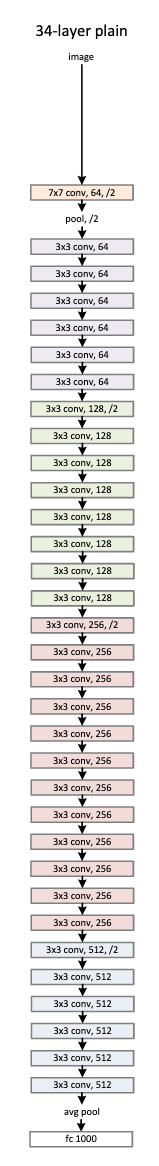

If the 7x7 Convolution Layer at the beginning is considered as Layer-0, can you guess the shapes of features coming out from Layer-1, Layer-2, Layer-3 and Layer-4 where each layer is represented by a different color?

In [36]:
feature_extractor = timm.create_model('resnet34', features_only=True, out_indices=[2,3,4])
out = feature_extractor(x)
print(out[0].shape, out[1].shape, out[2].shape)

torch.Size([1, 128, 28, 28]) torch.Size([1, 256, 14, 14]) torch.Size([1, 512, 7, 7])


In [47]:
model.layer1

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_block): Identity()
    (act1): ReLU(inplace=True)
    (aa): Identity()
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act2): ReLU(inplace=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_block): Identity()
    (act1): ReLU(inplace=True)
    (aa): Identity()
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act2): ReLU(inplace=

In [ ]:
# Search domain of models - NLP, CV
# Search category of models -  detection, classification, segmentation, 
# type of pretrained weights - MSCOCO , Imagenet,  any other-task specific?